# Plots

This file demonstrates how to create plots in Julia by using the [Plots](https://github.com/JuliaPlots/Plots.jl) package (using PyPlot or GR as the backend).

See [Julia Plots Gallery](https://goropikari.github.io/PlotsGallery.jl/) for examples (with code snippets).

## Load Packages and Extra Functions

In [1]:
using Dates, Plots

#pyplot(size=(500,333))
gr(size=(480,320))
default(fmt = :svg)

# A First Plot

The next cell creates and shows a first plot.

The first plot takes a bit of time. Subsequent plots are much quicker.

The $x$ and $y$ values in this file are in vectors and matrices, so all the examples can be applied to (statistical) data. (In contrast, when your aim is to plot functions, then you can actually avoid generating the y values. See the manual for a discussion.)

The `savefig()` command (see below) saves the plot to a graphics file.

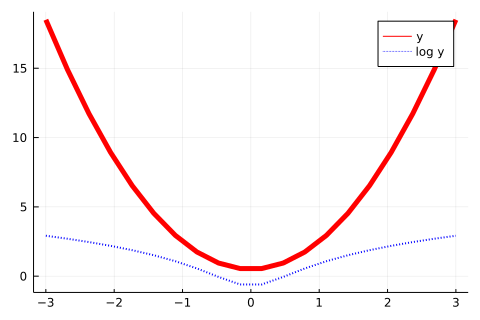

In [2]:
x = range(-3,stop=3,length=20)      #something to plot
y = 2*x.^2 .+ 0.5

p1 = plot( [x x],[y log.(y)],
           label = ["y" "log y"],
           linecolor = [:red :blue],
           linestyle = [:solid :dot],
           linewidth = [5 2] )
display(p1)       #not needed in notebook, but useful in script

In [3]:
plotattr("linestyle")             #see all available options

linestyle {Symbol}
linestyles, ls, s, style

Style of the line (for path and bar stroke).  Choose from [:auto, :solid, :dash, :dot, :dashdot, :dashdotdot]
Series attribute,  default: solid


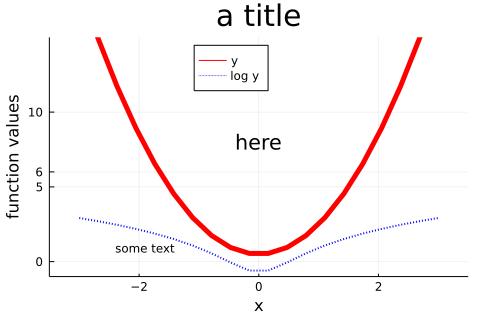

In [4]:
#now with title, labels and more

p1 = plot( [x x],[y log.(y)],
           label = ["y" "log y"],
           legend = :top,
           linecolor = [:red :blue],
           linestyle = [:solid :dot],
           linewidth = [5 2],
           title = "a title",
           titlefont = font(20),
           xlabel = "x",
           ylabel = "function values",
           xlims = (-3.5,3.5),
           ylims = (-1,15),
           xticks = [-2;0;2],
           yticks = [0;5;6;10],
           annotation = ([-1.9,0],[0.9,8],[text("some text",8),"here"]) )
display(p1)

In [5]:
savefig("AFirstPlot.pdf")              #change to .svg or .png

# Subplots

Use ```layout = (2,2)``` to create a 2x2 plot and `layout = @layout[a a;a _]` to create a 2x2 plot where the last subplot is blank. In the latter case, `a` just indicates that there should be a visible subplot (you could use another symbol, eg `b`) and `_` that the subpot should be blank.

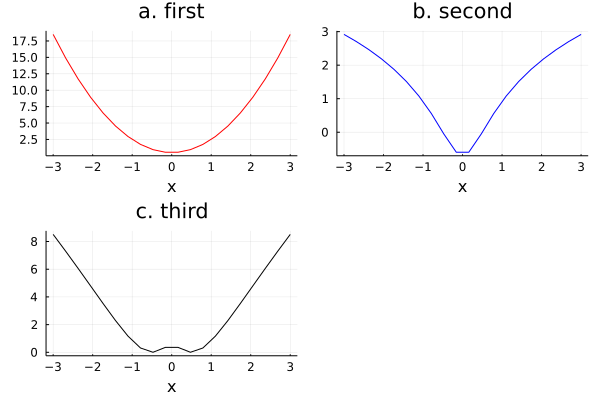

In [6]:
p1 = plot( [x x x],[y log.(y) log.(y).^2],
           #layout = (2,2),
           layout = @layout[a a;a _],
           size = (600,400),
           linecolor = [:red :blue :black],
           title = ["a. first" "b. second" "c. third"],
           xlabel = "x",
           legend = false )
display(p1)

# Adding Horizontal and Vertical Lines

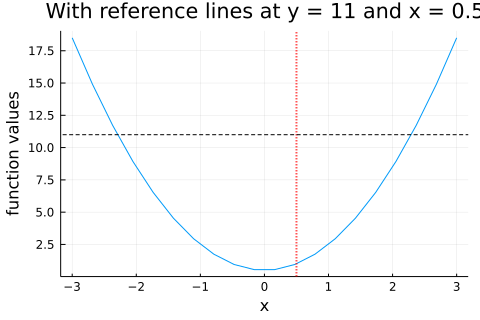

In [7]:
p1 = plot( x,y,
           legend = false,
           title = "With reference lines at y = 11 and x = 0.5",
           xlabel = "x",
           ylabel = "function values" )

vline!([0.5],linecolor=:red,line=(:dot,2))   #easiest to not integrate this in plot()
hline!([11],linecolor=:black,line=(:dash,1))
display(p1)

# LaTeX in the Figure

`gr()` can include LaTeX elements. Such strings need to be just LaTeX code, so you need a work-around to combine it with text: see `title` in the cell below. In particualr, notice that `\mathrm{}` creates ordinary text and that `\` gives a space.

To insert the value of the variable `z` into the LaTeX string ("string interpolation"), use `%$z` instead of the standard `$z`.

(You may also consider `pyplot()` which has extensive support for LaTeX.)

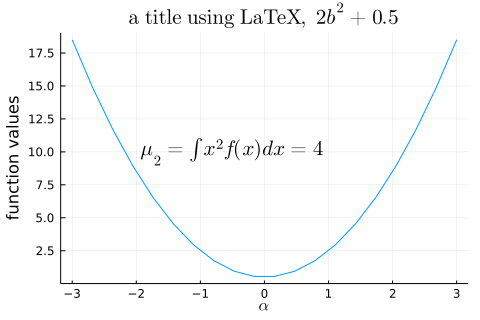

In [8]:
using LaTeXStrings                 #add some LaTeX to the figure

z = 4                             #a value to be used inside the string

p1 = plot( x,y,legend = false,
           title = L"$\mathrm{a \ title \ using \ LaTeX,\ } 2 b^2 + 0.5$",
           xlabel = L"$\alpha$",
           ylabel = "function values",
           annotation = (-0.5,10,L"$\mu_2 = \int x^2 f(x) dx = %$z $") )     #notice %$z
display(p1)

In [9]:
savefig("ASecondPlot.pdf")

# Bars and Stairs Plots

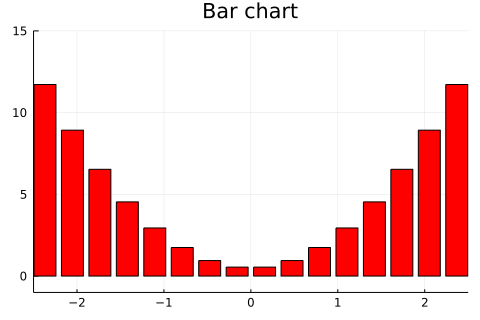

In [10]:
p1 = bar( x,y,
          legend = false,
          fillcolor = :red,
          xlims = (-2.5,2.5),
          ylims = (-1,15),
          title = "Bar chart" )
display(p1)

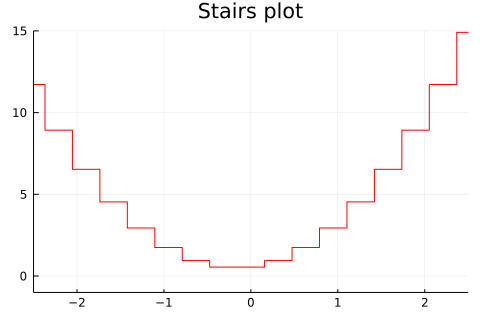

In [11]:
p1 = plot( x,y,
           linetype = :steppre,
           linecolor = :red,
           legend = false,
           xlims = (-2.5,2.5),
           ylims = (-1,15),
           title = "Stairs plot" )
display(p1)

# Surface Plot

In case the surface plot (below) does not work with the default backend (`gr()`), switch over to ```pyplot(size=(500,333))``` and then try again.

(20,)(25,)(25, 20)

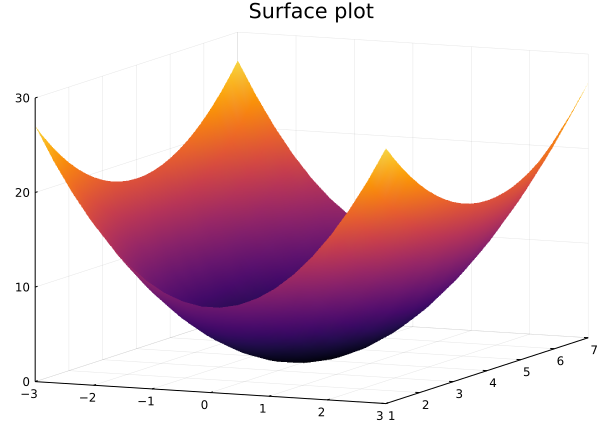

In [12]:
x = range(-3,stop=3,length=20)       #create some "data" to plot
y = range(1,stop=7,length=25)

z = fill(NaN,(length(x),length(y)))  #to put results in, initialized as NaNs
for j = 1:length(y)                  #create z2 column by column
  z[:,j] = 2*x.^2 .+ (y[j]-4)^2 - 0.0*x.*(y[j]-4)
end

#notice the arguments: x,y,z'
println(size(x),size(y),size(z'))

#pyplot(size=(500,333))                   #in case surface does not work with gr()
p1 = surface( x,y,z',
              size = (600,433),
              legend = false,
              xlims = (-3,3),
              ylims = (1,7),
              zlims = (0,30),
              title = "Surface plot" )
display(p1)

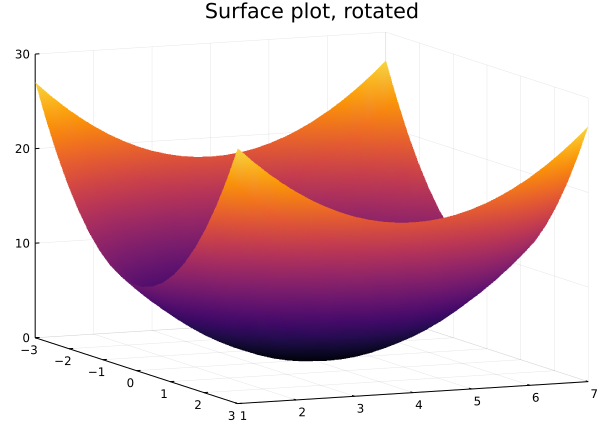

In [13]:
p1 = surface( x,y,z',
              size = (600,433),
              camera = (60,30),
              legend = false,
              xlims = (-3,3),
              ylims = (1,7),
              zlims = (0,30),
              title = "Surface plot, rotated" )
display(p1)

# Contour Plot

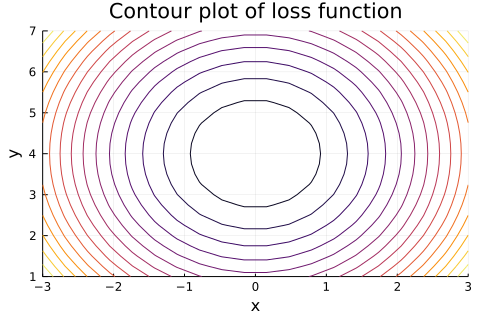

In [14]:
p1 = contour(x,y,z',                 #notice the transpose: z'
            legend = false,
            title = "Contour plot of loss function",
            xlabel = "x",
            ylabel = "y")
display(p1)

# Scatter and Histogram

In [15]:
plotattr("markershape")                #to see available options

markershape {Symbol, Shape, or AbstractVector}
markershapes, shape

Choose from [:none, :auto, :circle, :rect, :star5, :diamond, :hexagon, :cross, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x].
Series attribute,  default: none


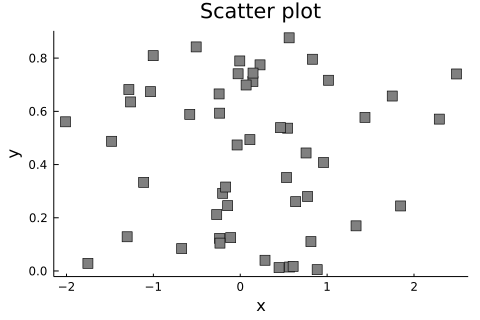

In [16]:
N = 51
x = randn(N)
y = rand(N)

p1 = scatter( x,y,
              markersize = 5,
              markercolor = :grey,
              markershape = :rect,
              legend = false,
              grid = false,
              title = "Scatter plot",
              xlabel = "x",
              ylabel = "y" )
display(p1)

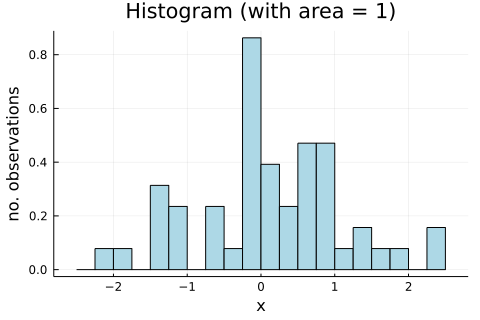

In [17]:
p1 = histogram( x,
                bins = -2.5:0.25:2.5,
                normalize = true,
                fillcolor = :lightblue,
                legend = false, 
                title = "Histogram (with area = 1)",
                xlabel = "x",
                ylabel = "no. observations" )
display(p1)

# Time Series Plots

We can use a `Date()` vector as the x-axis variable.

To insert lines, annotations and tick marks, the $x$ values are defined as, for instance, `Date(2016,8,15)`. 

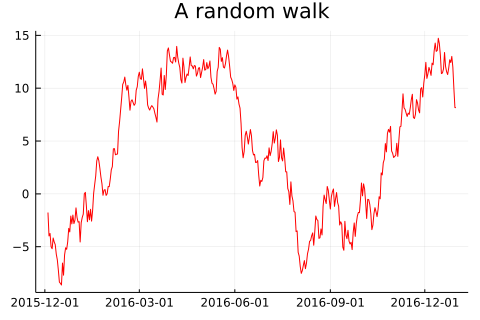

In [18]:
dN = Date(2015,12,4):Dates.Day(1):Date(2016,12,31)   #just faking some dates
y  = randn(length(dN))                               #some random numbers to plot 

p1 = plot( dN,cumsum(y),
           linecolor = :red,
           legend = false,
           title = "A random walk" )
display(p1)

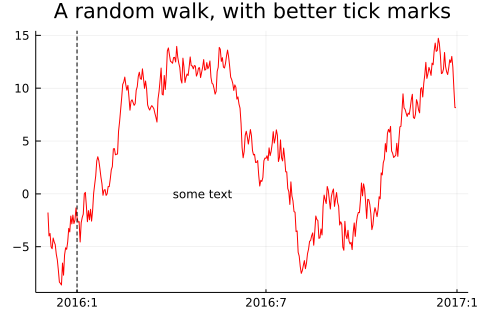

In [19]:
xTicksLoc = [Date(2016,1),Date(2016,7),Date(2017,1)]
xTicksLab = Dates.format.(xTicksLoc,"Y:m")    #see Dates.format for more options

p1 = plot( dN,cumsum(y),
           linecolor = :red,
           legend = false,
           xticks = (xTicksLoc,xTicksLab),
           title = "A random walk, with better tick marks",
           annotation = (Date(2016,5),0,text("some text",8)) )

vline!([Date(2016)],linecolor=:black,line=(:dash,1))
display(p1)